In [2]:
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



In [5]:
# Convert labels to one-hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

# Load trained model
model = load_model("model/basesd_model_new.h5")

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)




Test Loss: 0.1939397156238556
Test Accuracy: 0.8108999729156494


In [8]:
# Predict classes for test data
y_pred = model.predict(x_test)
# Convert probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to single labels
y_test_labels = np.argmax(y_test, axis=1)
# Generate classification report
print(classification_report(y_test_labels, y_pred))


313/313 [==============================] - 8s 24ms/step
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1000
           1       0.89      0.93      0.91      1000
           2       0.72      0.75      0.74      1000
           3       0.66      0.65      0.65      1000
           4       0.85      0.72      0.78      1000
           5       0.74      0.70      0.72      1000
           6       0.89      0.84      0.86      1000
           7       0.86      0.84      0.85      1000
           8       0.87      0.90      0.89      1000
           9       0.85      0.89      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



Цей результат є звітом про класифікацію моделі на тестових даних. Оцінка моделі здійснюється за допомогою різних метрик для кожного класу, а також для всіх класів разом.

1. Для кожного класу вказані значення precision, recall і F1-показник. 
   - Precision - це відношення правильно класифікованих позитивних прикладів до всіх прикладів, що були класифіковані як позитивні. 
   - Recall - це відношення правильно класифікованих позитивних прикладів до всіх позитивних прикладів у вибірці. 
   - F1-score - це гармонічне середнє між precision і recall.

2. Також надана загальна точність (accuracy) моделі на тестових даних, яка показує відсоток правильно класифікованих прикладів відносно загальної кількості прикладів.

3. Macro avg - середнє значення метрик для кожного класу.
   Weighted avg - ваговане середнє значення метрик, де кожен клас рахується залежно від його кількості в тестовій вибірці.

У цьому результаті ми бачимо, що модель має достатньо високі метрики точності, включаючи загальну точність близько 81%. При цьому для деяких класів (наприклад, класи 1, 8, 9) модель показує дуже високу точність, тоді як для інших класів (наприклад, класи 2, 3, 5) точність може бути нижчою. Це може свідчити про нерівномірну ефективність моделі для різних класів даних.

In [18]:
num_classes = 10
classes = { 0:"airplane(літак)", 
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кiт)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

In [9]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[894  13  13   7   5   5   3   3  37  20]
 [  9 929   1   1   1   2   3   0  14  40]
 [ 68   6 752  40  35  39  29  20   8   3]
 [ 32  12  65 645  29 113  28  27  22  27]
 [ 30   1  64  58 721  30  25  48  17   6]
 [ 16  10  57 125  23 703   8  32  10  16]
 [  7   2  53  48  15  16 838   4   9   8]
 [ 10   6  34  36  17  31   3 836   2  25]
 [ 47  12   5   5   1   3   2   5 903  17]
 [ 22  54   2   8   0   3   4   2  17 888]]


Confusion Matrix (Матриця плутанини) - це інструмент для візуалізації результатів класифікації, де рядки представляють істинні класи, а стовпці - передбачені класи. Кожен елемент матриці показує кількість прикладів, які були класифіковані як конкретний клас. Діагональ матриці відповідає правильно класифікованим прикладам, а відхилення від діагоналі показує помилки класифікації.

Давайте проаналізуємо результати на основі наданої матриці плутанини:

Групування правильно класифікованих прикладів (діагональ матриці):
- Найбільші значення на діагоналі співпадають з найбільшими числами, що свідчить про те, що модель успішно класифікувала ці класи.
- Найбільші значення знаходяться у верхньому лівому та нижньому правому кутах, що означає, що класи "літак" і "вантажівка" були класифіковані з високою точністю.
Помилки класифікації (відхилення від діагоналі):
- Інші елементи матриці, які не знаходяться на діагоналі, показують помилки класифікації. Наприклад, у верхньому правому куті матриці бачимо значну кількість помилково класифікованих зображень автомобілів як вантажівки.
Загальний аналіз:
- У матриці плутанини є помилки в класифікації для всіх класів, але деякі помилки більш значущі, ніж інші. Наприклад, є кілька класів, які були помилково класифіковані як інші класи з високою частотою, що може бути причиною низької точності моделі для цих класів.

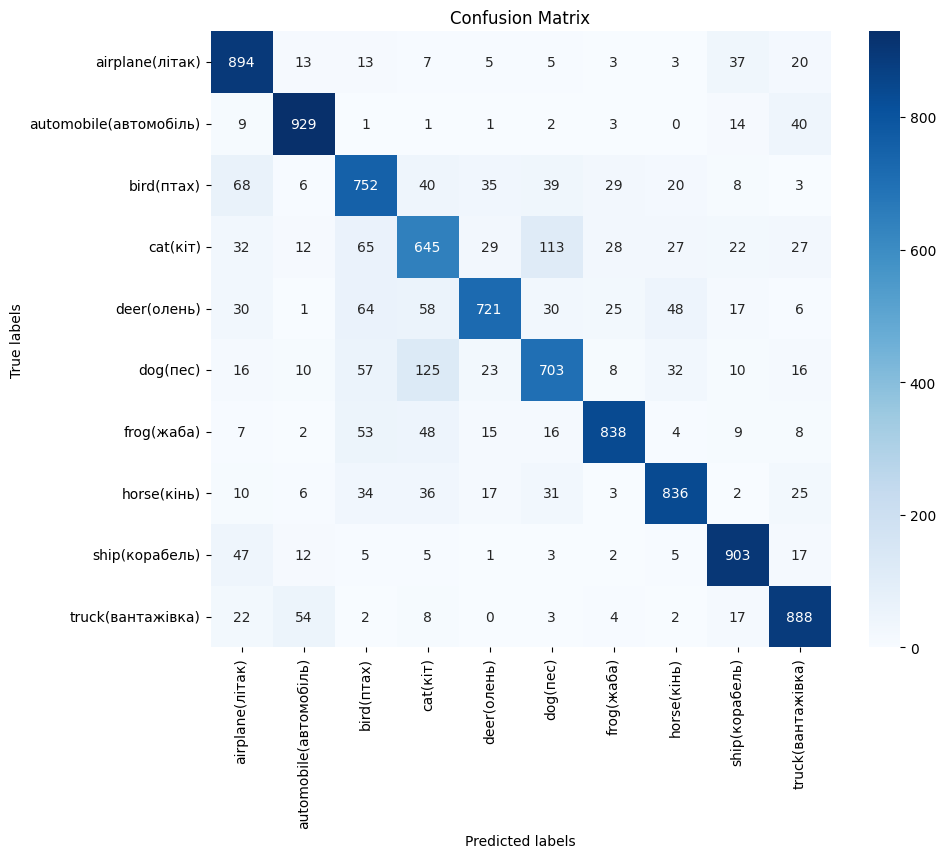

In [19]:
# Visualize confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=classes.values(), yticklabels=classes.values())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.metrics import cohen_kappa_score, f1_score, matthews_corrcoef

# Compute Cohen's Kappa
kappa = cohen_kappa_score(y_test_labels, y_pred)
print("Cohen's Kappa:", kappa)

# Compute F1 Score
f1 = f1_score(y_test_labels, y_pred, average='weighted')
print("F1 Score:", f1)

# Compute Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test_labels, y_pred)
print("Matthews Correlation Coefficient:", mcc)

Cohen's Kappa: 0.7898888888888889
F1 Score: 0.8098931627831613
Matthews Correlation Coefficient: 0.790140579971061


Отримані метрики дають досить хорошу оцінку якості моделі класифікації:

- Cohen's Kappa: значення Коена Каппи 0.7899 свідчить про високу узгодженість між передбачуваними та справжніми мітками класів. Це означає, що модель добре прогнозує класи, і враховується випадковість.
- F1 Score: значення F1 Score 0.8099 також є високим і вказує на добру балансу між точністю та повнотою у класифікації. Він обчислюється як гармонічне середнє між точністю і повнотою, де значення близьке до 1 вказує на високу якість класифікації.
- Matthews Correlation Coefficient (MCC): значення 0.7901 MCC також є досить високим. MCC враховує усі чотири класи на матриці плутанини і дає загальну міру узгодженості. Значення близьке до 1 вказує на добру узгодженість.

Отже, на основі цих метрик можна визначити, що модель показує добрі результати в класифікації зображень з датасету CIFAR-10.